In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Read in data as DataFrame
df = pd.read_csv('data/features_3_sec.csv').drop(columns=['filename', 'length'])

# Extract feature names and store features in X
features = list(df.columns)[:-1]
X = df[features]

# Encode and store labels in y, extract label names
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']]).toarray()
labels = encoder.get_feature_names_out(['label'])

# Add encoded labels back into df
encoded_df = pd.DataFrame(y, columns=labels)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['label'], inplace=False)

# Partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature data, fitting to the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

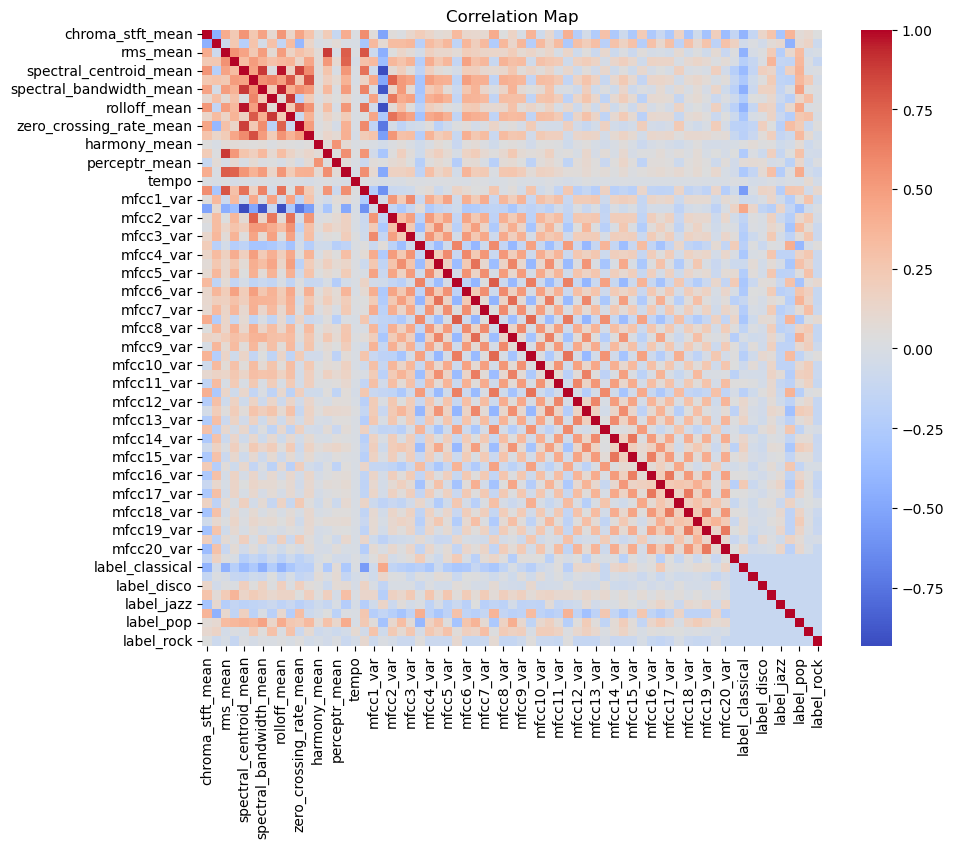

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

In [4]:
xgb_base = xgb.XGBClassifier(objective='binary:logistic')
multilabel_model = MultiOutputClassifier(xgb_base)

multilabel_model.fit(X_train, y_train)
y_pred = multilabel_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7932932932932933


In [5]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Get best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
